# Import

In [112]:
# Data processing
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model
from sklearn.mixture import GaussianMixture

# Load Dataset

In [19]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/Numerical/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Sampling Dataset

In [20]:

# Take a sample of data
data_sample = data.sample(frac=0.1, random_state=1)

data_sample.shape

(28481, 31)

In [47]:

# Count fraudulent transactions (Class = 1)
num_fraudulent = data_sample['Class'].value_counts().get(1, 0)

# Count normal transactions (Class = 0)
num_normal = data_sample['Class'].value_counts().get(0, 0)

# Calculate the ratio
if num_normal > 0:
    ratio = num_fraudulent / num_normal
else:
    ratio = float('inf')  # Avoid division by zero if there are no normal transactions

print(f'Number of fraudulent transactions: {num_fraudulent}')
print(f'Number of normal transactions: {num_normal}')
print(f'Ratio of fraudulent to normal transactions: {ratio: f}')

Number of fraudulent transactions: 49
Number of normal transactions: 28432
Ratio of fraudulent to normal transactions:  0.001723


# Format Data

In [21]:
y = data_sample['Class']
X = data_sample.drop(['Time', 'Class'], axis=1)

In [22]:
len(data_sample[data_sample['Class']==1])

49

# Normalize and scale

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Declare Model

In [25]:
# Define the range for n_components
n_components_range = range(1, 11)

# Lists to store the BIC and AIC scores
bic_scores = []
aic_scores = []

# Fit GMM for each n_components and calculate BIC and AIC
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, n_init=5, random_state=42)
    gmm.fit(X_scaled)
    bic_scores.append(gmm.bic(X_scaled))
    aic_scores.append(gmm.aic(X_scaled))

In [27]:
bic_scores

[2274864.32825385,
 616635.9330906983,
 -827966.8303762106,
 -1002366.490664897,
 -1127474.0523218268,
 -1235496.1383527063,
 -1564334.9994071915,
 -1442879.7223956347,
 -1647161.9536431676,
 -1791326.4751689136]

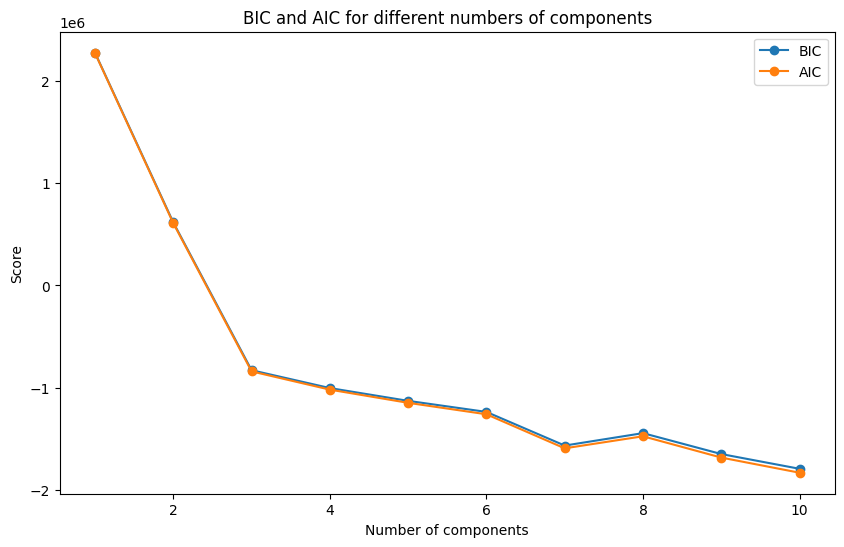

In [26]:
# Plot BIC and AIC scores
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, bic_scores, label='BIC', marker='o')
plt.plot(n_components_range, aic_scores, label='AIC', marker='o')
plt.xlabel('Number of components')
plt.ylabel('Score')
plt.title('BIC and AIC for different numbers of components')
plt.legend()
plt.show()

In [28]:
# Fit GMM model
gmm = GaussianMixture(n_components=6, n_init=5, random_state=42)
y_gmm = gmm.fit(X_scaled)

In [111]:
data_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,score,predicted_class
169876,119907.0,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,1.79,0,-25.278972,0
127467,78340.0,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,1.98,0,13.893031,0
137900,82382.0,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,0.89,0,14.206917,0
21513,31717.0,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,15.98,0,10.331352,0
134700,80923.0,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,0.76,0,70.745910,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2032,1574.0,-0.615776,0.654356,2.618793,0.857434,-0.487340,0.593957,-0.095191,0.426786,0.011607,...,-0.313035,-0.015388,0.213878,-0.268579,0.117815,0.075734,9.99,0,12.849724,0
240932,150813.0,-3.517229,3.326821,-3.590262,0.674769,-0.679266,-0.469516,-1.135362,2.778095,-2.404956,...,0.268986,0.382692,-0.653335,2.192962,-0.953907,-0.137082,0.76,0,-34.794721,0
3701,3169.0,-0.315540,1.054303,1.484711,1.138262,0.394713,-0.168883,0.737923,-0.061284,-0.952381,...,0.024370,0.091800,-0.463470,-0.457328,0.194541,0.166039,19.60,0,13.394998,0
153365,98752.0,-3.580417,4.100916,-2.577720,-1.476718,-0.006201,-2.008418,0.887262,0.304192,2.879710,...,-0.001519,0.009117,0.321669,0.034900,0.785417,0.353092,0.92,0,-44.452282,0


In [29]:
# Compute scores
score = gmm.score_samples(X_scaled)
data_sample['score'] = score

In [103]:
# Determine threshold for anomalies
threshold = np.percentile(score, 0.3)
print(f'The threshold of the score is {threshold:.2f}')

The threshold of the score is -79.78


In [104]:
from sklearn.metrics import roc_curve, f1_score

In [105]:
# # ROC Curve Method
# fpr, tpr, thresholds = roc_curve(y, score, pos_label=1)
# optimal_idx = np.argmax(tpr - fpr)
# threshold = thresholds[optimal_idx]
# print(f'The optimal threshold based on Youden\'s J statistic is {threshold:.2f}')

In [106]:
# Assign anomaly labels based on the threshold
data_sample['predicted_class'] = (data_sample['score'] < threshold).astype(int)

In [107]:
len(data_sample[data_sample['predicted_class']==1])

86

In [108]:
from sklearn.metrics import confusion_matrix, classification_report

In [109]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y, data_sample['predicted_class'])
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[28367    65]
 [   28    21]]


In [110]:
# Generate classification report
class_report = classification_report(y, data_sample['predicted_class'])
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.24      0.43      0.31        49

    accuracy                           1.00     28481
   macro avg       0.62      0.71      0.65     28481
weighted avg       1.00      1.00      1.00     28481

